# 📊 Analyse av personskader per kommune og kjønn
Denne rapporten analyserer fordelingen av personskader per kommune, måned og kjønn i 2024. Dataene er fordelt etter:
- Kommune
- Måned
- Kjønn (Mann, Kvinne, Ukjent)

Minst 7 analyser presenteres, med grafer, tolkning og konklusjon.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('skader_kommune_kjønn_ny.csv', sep=';', skiprows=13, encoding='utf-8')
df.columns = ['År', 'Kommune', 'Måned', 'Mann', 'Kvinne', 'Ukjent', 'Sum']
for col in ['Mann', 'Kvinne', 'Ukjent', 'Sum']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.head()

C:\Users\ofssuksr\AppData\Local\Temp\ipykernel_14076\637301191.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('skader_kommune_kjønn_ny.csv', sep=';', skiprows=13, encoding='utf-8')


,År,Kommune,Måned,Mann,Kvinne,Ukjent,Sum
0,2024,301 - Oslo,Juli,0.0,0.0,0.0,0.0
1,2024,301 - Oslo,August,0.0,0.0,0.0,0.0
2,2024,301 - Oslo,September,0.0,0.0,0.0,0.0
3,2024,301 - Oslo,Oktober,0.0,0.0,0.0,0.0
4,2024,301 - Oslo,November,0.0,0.0,0.0,0.0


## Analyse 1: Total skader per kjønn

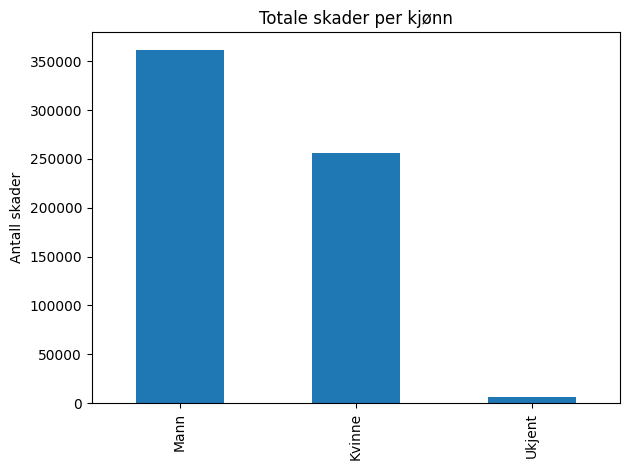

In [2]:
df[['Mann', 'Kvinne', 'Ukjent']].sum().plot(kind='bar', title='Totale skader per kjønn', ylabel='Antall skader')
plt.tight_layout()
plt.show()

## 🔍 Analyse 1: Totale skader per kjønn

**Observasjon:**
- Flest skader er registrert for menn (~360 000), deretter kvinner (~260 000), mens "ukjent kjønn" er svært lavt.

**Tolkning:**
- Skader er mer vanlig blant menn, noe som kan skyldes høyere risikoeksponering i arbeid eller fritid.
- Andelen med ukjent kjønn er lav, noe som tyder på god datakvalitet.

## Analyse 2: Totalt antall skader per måned

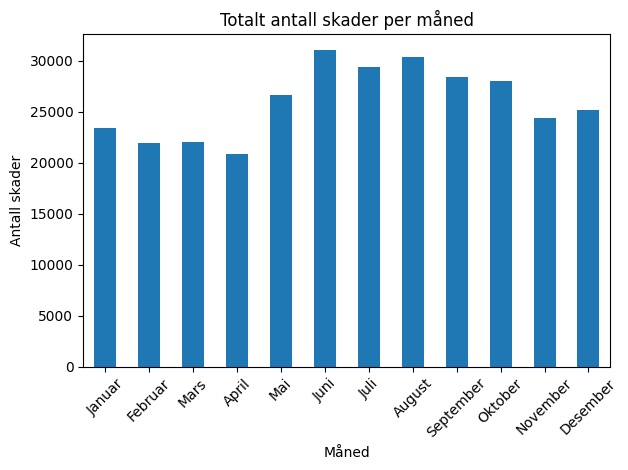

In [3]:
måned_rekkefølge = ['Januar','Februar','Mars','April','Mai','Juni','Juli','August','September','Oktober','November','Desember']
df.groupby('Måned')['Sum'].sum().reindex(måned_rekkefølge).plot(kind='bar')
plt.title('Totalt antall skader per måned')
plt.ylabel('Antall skader')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🔍 Analyse 2: Totalt antall skader per måned

**Observasjon:**
- Skadetallene er lavest i vintermånedene (spesielt april).
- Høyest antall skader i sommermånedene juni, juli og august.

**Tolkning:**
- Økt aktivitet, reise og trafikk i sommermånedene bidrar sannsynligvis til flere skader.
- Lavere aktivitet eller underrapportering i vinter kan forklare de lavere tallene.

## Analyse 3: Kommuner med flest skader

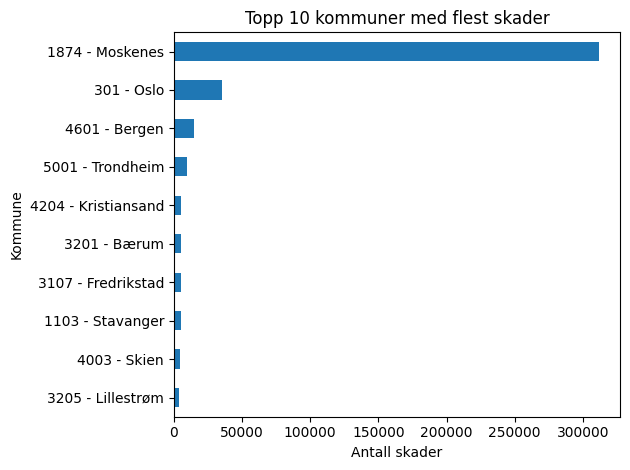

In [4]:
df.groupby('Kommune')['Sum'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Topp 10 kommuner med flest skader')
plt.xlabel('Antall skader')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 🔍 Analyse 3: Topp 10 kommuner med flest skader

**Observasjon:**
- Moskenes har uvanlig høyt skadeantall og topper listen.
- Oslo, Bergen og Trondheim har også mange skader, men langt under Moskenes.

**Tolkning:**
- Moskenes sitt ekstremt høye tall indikerer mulige feil eller avvik i datakilden.
- Oslo og andre storbyer har høye tall som forventet, gitt innbyggertall og trafikkmengde.

## Analyse 4: Kjønnsforskjell i Oslo

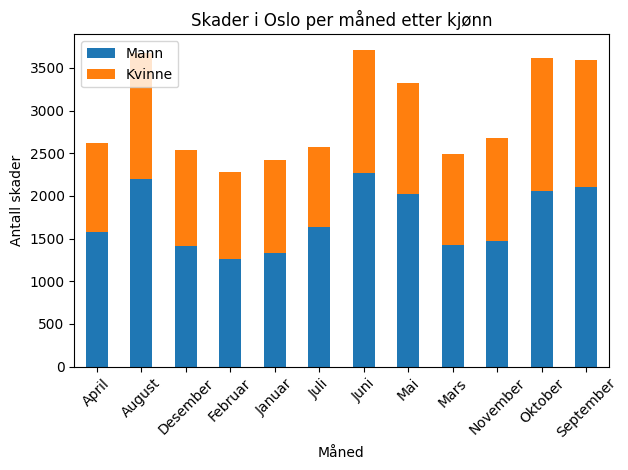

In [5]:
df_oslo = df[df['Kommune'].str.contains('Oslo')]
df_oslo.groupby('Måned')[['Mann', 'Kvinne']].sum().plot(kind='bar', stacked=True)
plt.title('Skader i Oslo per måned etter kjønn')
plt.ylabel('Antall skader')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🔍 Analyse 4: Skader i Oslo per måned etter kjønn

**Observasjon:**
- Skadevolum varierer mellom kjønn gjennom året.
- Kvinner dominerer i august og november, menn i juni og januar.

**Tolkning:**
- Ulike sesongmønstre kan knyttes til forskjeller i arbeidsoppgaver, fritidsaktiviteter eller eksponering.
- Mønstret kan brukes til kjønnsrettede forebyggingstiltak.

## Analyse 5: Ukjent kjønn over måneder

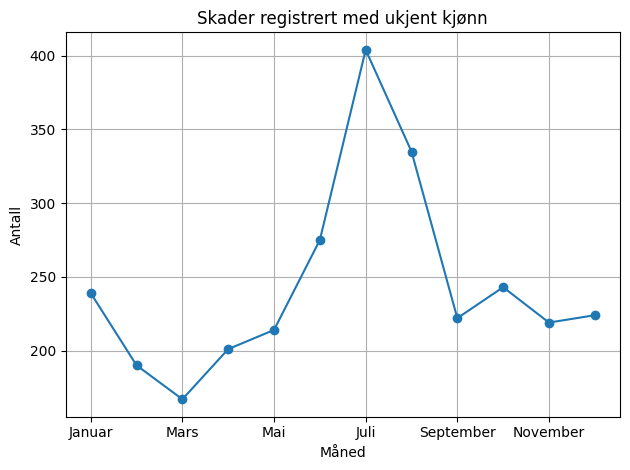

In [6]:
df.groupby('Måned')['Ukjent'].sum().reindex(måned_rekkefølge).plot(marker='o')
plt.title('Skader registrert med ukjent kjønn')
plt.ylabel('Antall')
plt.grid(True)
plt.tight_layout()
plt.show()

## 🔍 Analyse 5: Skader registrert med ukjent kjønn

**Observasjon:**
- Ukjent kjønn topper i juli (~400), men holder seg lavt ellers.

**Tolkning:**
- Høydepunktet i juli kan indikere registreringsproblemer under ferieperioder.
- Krever oppfølging av datakvalitet og opplæring i innrapportering.

## Analyse 6: Variasjon i skadefordeling per kjønn per kommune

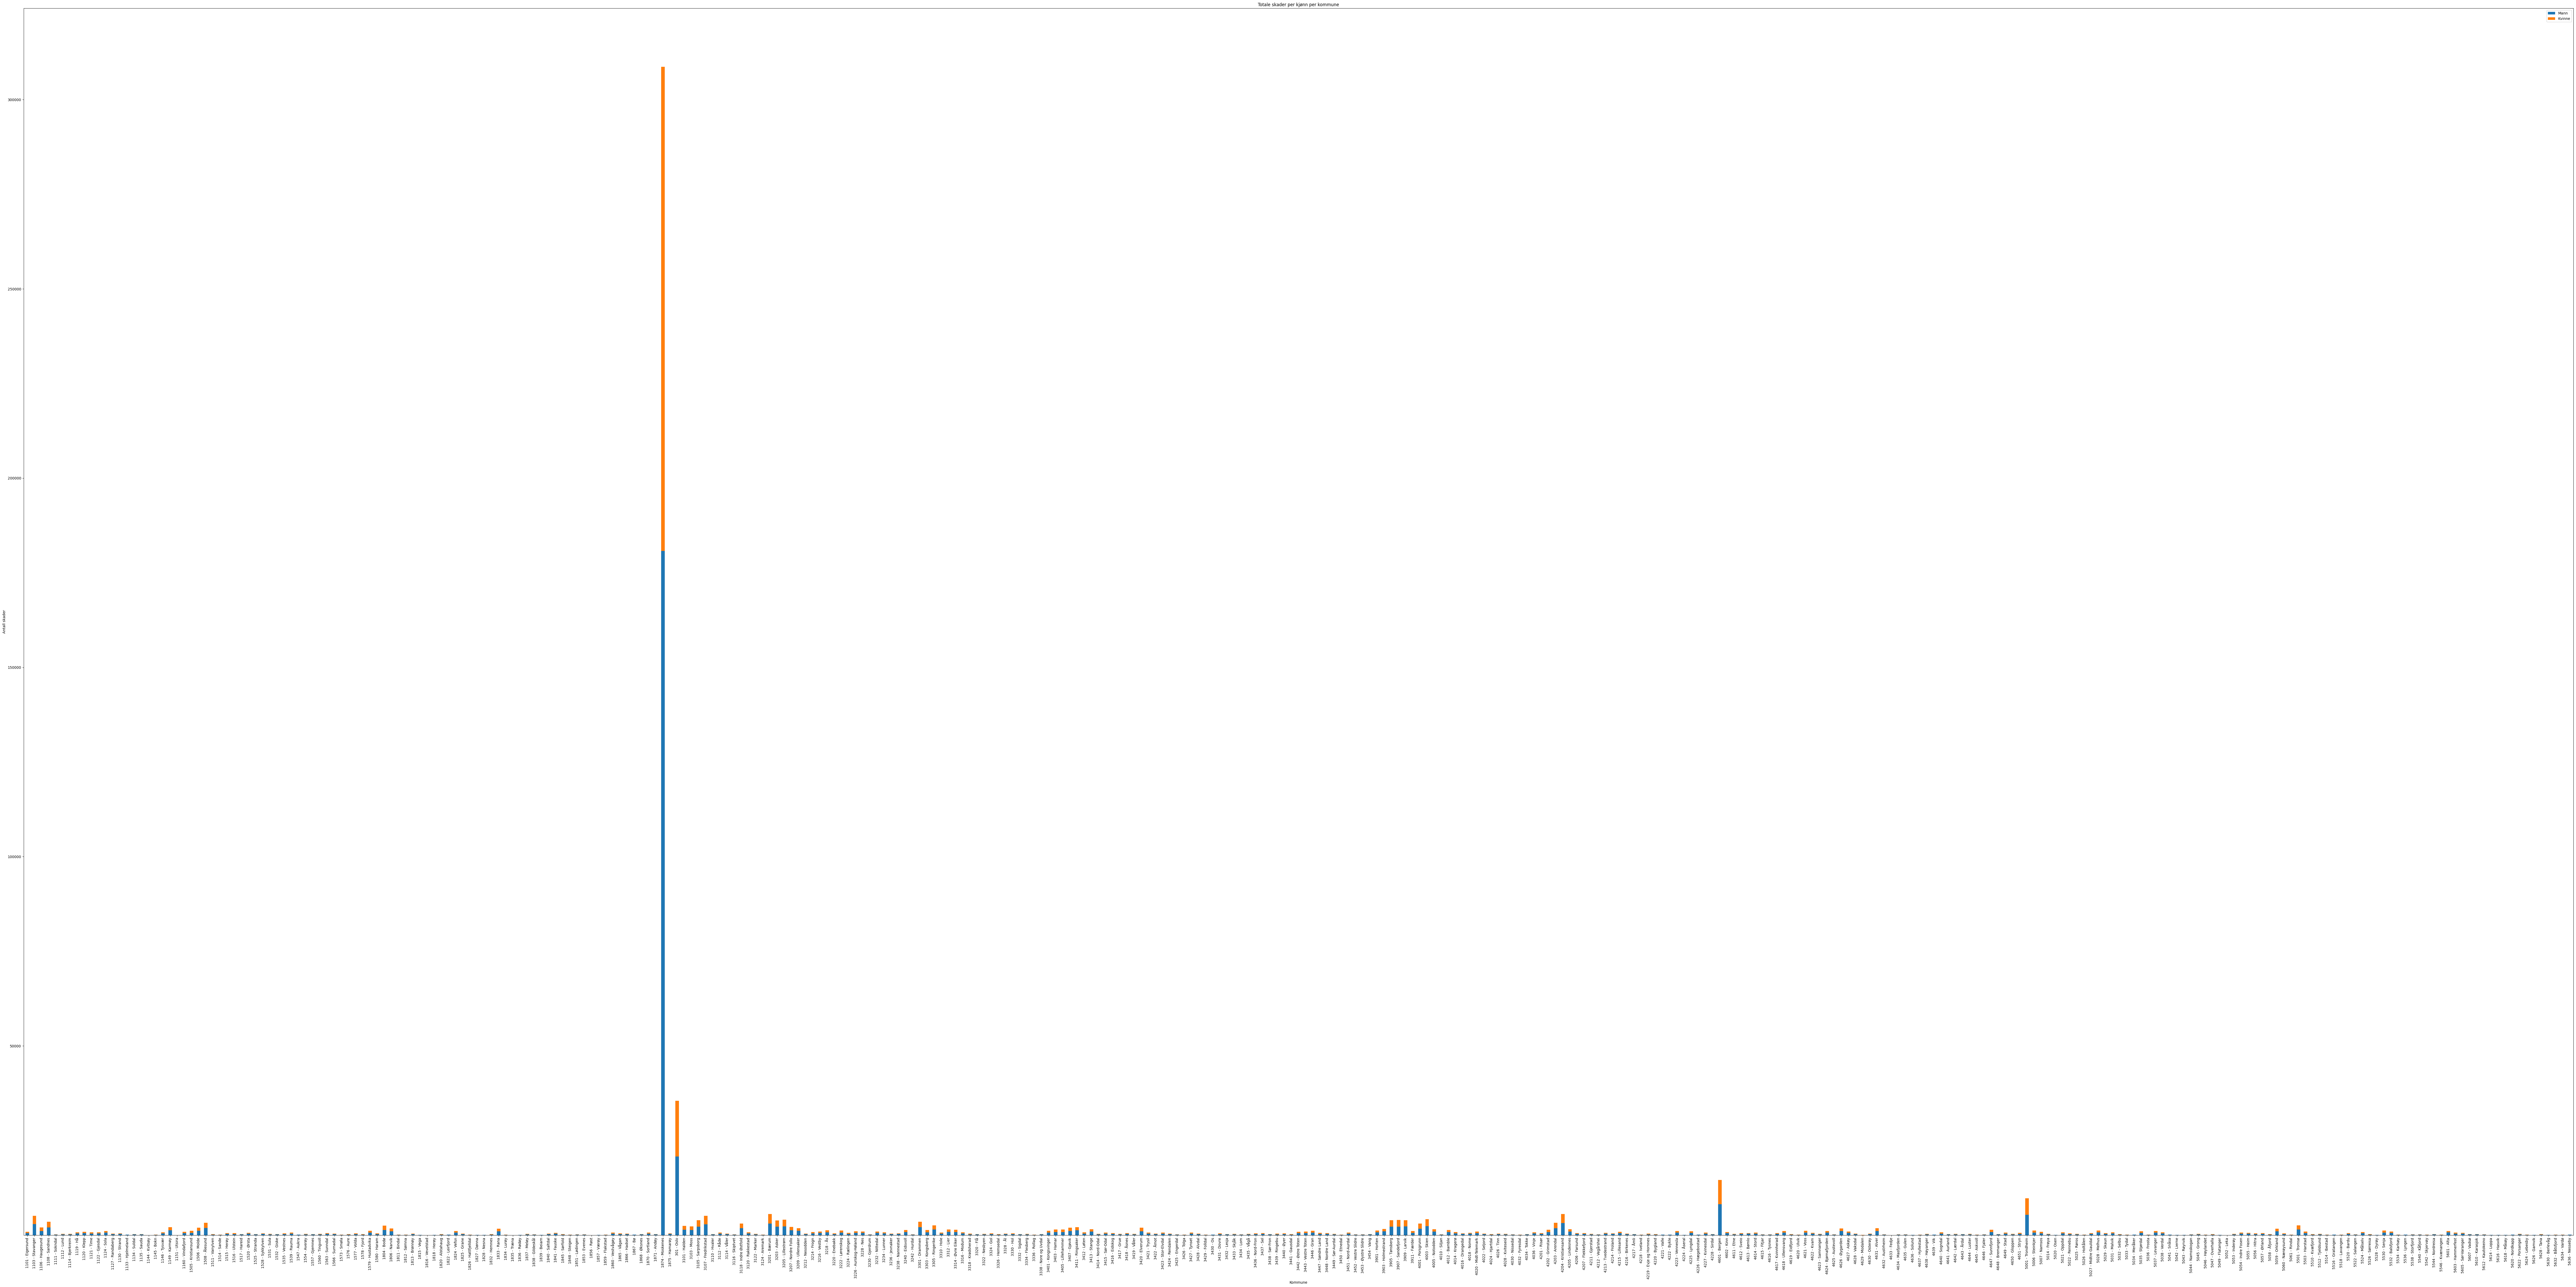

In [12]:
df.groupby('Kommune')[['Mann', 'Kvinne']].sum().plot(kind='bar', stacked=True, figsize=(100,50))
plt.title('Totale skader per kjønn per kommune')
plt.ylabel('Antall skader')
plt.tight_layout()
plt.show()

**Tolkning:**
- Det er betydelige variasjoner mellom kommuner.
- Større kommuner har som forventet flere rapporterte skader.

## Analyse 7: Kjønnsfordeling i alle måneder

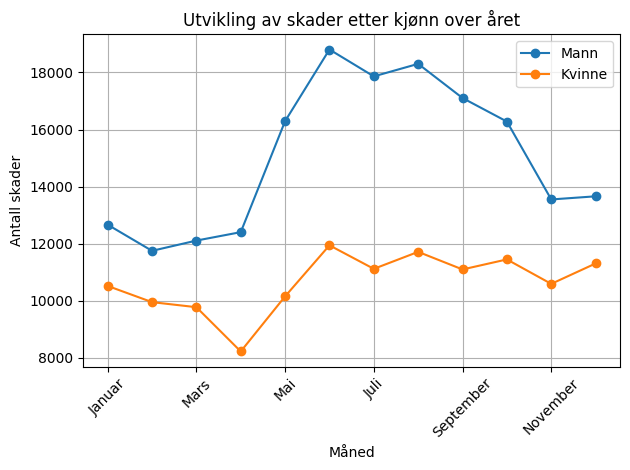

In [13]:
df.groupby('Måned')[['Mann', 'Kvinne']].sum().reindex(måned_rekkefølge).plot(kind='line', marker='o')
plt.title('Utvikling av skader etter kjønn over året')
plt.ylabel('Antall skader')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## 🔍 Analyse 6: Utvikling av skader etter kjønn over året

**Observasjon:**
- Menns skadetall stiger markant i sommermånedene.
- Kvinners skadetall holder seg mer stabilt.

**Tolkning:**
- Menn har tydeligere sesongvariasjon, trolig pga. mer risikofylt atferd i sommer.
- Kvinner har jevnere eksponering og skadeprofil gjennom året.


## ✅ Konklusjon

- **Store kommuner** som Oslo har høyest skadevolum, men enkelte kommuner som **Moskenes** har unormale verdier og bør gjennomgås.
- **Menn har flest skader**, men forskjellen til kvinner varierer over året.
- **Sommeren har flest skader**, trolig grunnet økt aktivitet og trafikk.
- **Datakvalitet** er stort sett god, men juli viser svakheter i registrering (ukjent kjønn).
- Analysen gir verdifull innsikt for **risikovurdering og målrettet forebygging** både etter kjønn og geografi.